# MIRA Regulatory Potential Modeling

In [1]:
!hostnamectl

   Static hostname: psh01com1hcom40
         Icon name: computer-server
           Chassis: server
        Machine ID: 96f6166d8c254e2e93a2d98b24996b27
           Boot ID: 635310819e254cabb54b3b6e944f8453
  Operating System: ]8;;https://www.redhat.com/Red Hat Enterprise Linux 8.10 (Ootpa)]8;;
       CPE OS Name: cpe:/o:redhat:enterprise_linux:8::baseos
            Kernel: Linux 4.18.0-553.22.1.el8_10.x86_64
      Architecture: x86-64


In [ ]:
import mira
import os
import scanpy as sc
import anndata
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", size = 12)

In [8]:
rna_adata = anndata.read_h5ad("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_rna_data_topic_analysis.h5ad")
atac_adata = anndata.read_h5ad("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_atac_data_topic_analysis.h5ad")

ds011_atac_model = mira.topics.load_model("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_atac_model.pth")
ds011_rna_model = mira.topics.load_model("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_rna_model.pth")

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


## TSS Annotations

We must annotate the genes in the dataset with TSS locations. MIRA provides hg38 and mm10 chromosome size and TSS data, but you can also use your own if you want. The format is a bit different for the TSS data than the one that I have been using

In [4]:
mira.datasets.mm10_chrom_sizes()
mira.datasets.mm10_tss_data()

INFO:mira.datasets.datasets:Dataset already on disk.
INFO:mira.datasets.datasets:Dataset contents:
	* mira-datasets/mm10.chrom.sizes
INFO:mira.datasets.datasets:Dataset already on disk.
INFO:mira.datasets.datasets:Dataset contents:
	* mira-datasets/mm10_tss_data.bed12


In [ ]:
# tss_data_file = 'mira-datasets/mm10_tss_data.bed12'
# tss_data = pd.read_csv('mira-datasets/mm10_tss_data.bed12', sep="\t")
# tss_data["#geneSymbol"] = tss_data["#geneSymbol"].str.capitalize()
# tss_data.to_csv('mira-datasets/mm10_tss_data.bed12', sep="\t", header=True, index=False)
# tss_data

,#chrom,#txStart,#txEnd,#geneSymbol,#score,#strand,#thickStart,#thickEnd,#itemRGB,#exonCount,#blockSizes,#blockStarts
0,chr1,3073252,3074322,4933401j01rik,0,+,0,0,0,1,1070,0
1,chr1,3102015,3102125,Gm26206,0,+,0,0,0,1,110,0
2,chr1,3214481,3671498,Xkr4,0,-,0,0,0,3,"2487,200,947","0,207220,456070"
3,chr1,3252756,3253236,Gm18956,0,+,0,0,0,1,480,0
4,chr1,3365730,3368549,Gm37180,0,-,0,0,0,1,2819,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55299,chrY,90753056,90763485,Mid1-ps1,0,+,0,0,0,7,"108,149,128,144,162,208,349","0,4244,5485,6465,7396,9022,10080"
55300,chrY,90785441,90816464,Gm47283,0,+,0,0,0,4,"538,122,85,29","0,7854,30907,30994"
55301,chrY,90837412,90844040,Gm21742,0,+,0,0,0,4,"108,149,128,163","0,4244,5485,6465"
55302,chrY,90838868,90839177,Gm21748,0,-,0,0,0,1,309,0


In [9]:
atac_adata.var

,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,endogenous_peaks,peak_id,chr,start,end
chr1:3670380-3671189,65,65,0.507830,92.729306,454,True,0,chr1,3670380,3671189
chr1:3671393-3672246,107,107,0.843400,88.031320,754,True,1,chr1,3671393,3672246
chr1:4491670-4492595,47,47,0.370246,94.742729,331,True,2,chr1,4491670,4492595
chr1:4492972-4493877,31,31,0.237136,96.532438,212,True,3,chr1,4492972,4493877
chr1:4571392-4572282,103,103,0.802013,88.478747,717,True,4,chr1,4571392,4572282
...,...,...,...,...,...,...,...,...,...,...
chrY:1245266-1246129,54,54,0.426174,93.959732,381,True,30486,chrY,1245266,1246129
chrY:90739847-90740620,143,143,1.116331,84.004474,998,True,30487,chrY,90739847,90740620
chrY:90742449-90743368,30,30,0.223714,96.644295,200,True,30488,chrY,90742449,90743368
chrY:90807208-90808023,30,30,0.230425,96.644295,206,True,30489,chrY,90807208,90808023


In [10]:
atac_adata.var["chr"] = atac_adata.var["chr"].astype(str)

In [11]:
mira.tl.get_distance_to_TSS(atac_adata,
                            tss_data='mira-datasets/mm10_tss_data.bed12',
                            genome_file='mira-datasets/mm10.chrom.sizes')

INFO:mira.tools.connect_genes_peaks:Finding peak intersections with promoters ...
INFO:mira.tools.connect_genes_peaks:Calculating distances between peaks and TSS ...
INFO:mira.tools.connect_genes_peaks:Masking other genes' promoters ...
INFO:mira.adata_interface.rp_model:Added key to var: distance_to_TSS
INFO:mira.adata_interface.rp_model:Added key to uns: distance_to_TSS_genes


Resave the `atac_adata` object after formatting

In [13]:
atac_adata.write_h5ad("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_atac_data_tss_dist.h5ad", convert_strings_to_categoricals = False)

## RP model training

With TSS annotations added, we can train RP models. Most RP-model related funcitons take the `expr_adata` and `atac_adata` keyword arguments, so it's easiest to put `rna_adata` and `atac_adata` into a dictionary for repeated use:

In [19]:
rp_args = dict(expr_adata = rna_adata, atac_adata= atac_adata)

Next, we instantiate an RP Model. MIRA refers to the RP model variant that uses local chromatin to predict gene expression as a *LITE* model - or **L**ocal chromatin accessibility-**I**nfluenced **T**ranscriptional **E**xpression model.

The `mira.rp.LITE_Model` object takes the expression and accessibility topic models. You must also define a list of genes to model. To keep this short, I will demonstrate training with four genes, but in a full analysis, we recommend training models for *all highly-variable genes, plus all genes that scored in the top 5% most-activated for any topic*, which gives a good survey of interesting gene expression variation in your data. This following snippet gives you that genelist:

In [65]:
# Ensure all gene names are uppercased to match TSS annotation
rp_genes = list(ds011_rna_model.features[ds011_rna_model.highly_variable])
for topic in range(ds011_rna_model.num_topics):
    rp_genes.extend(ds011_rna_model.get_top_genes(topic, 200))

# Capitalize and deduplicate
rp_genes = list(set(g.capitalize() for g in rp_genes if g.capitalize() in rna_adata.var_names))

print(rp_genes)

['Qrsl1', 'Gpcpd1', 'Atf6', 'Eda', 'Vps37b', 'Cog5', 'Prickle1', 'Hnrnpul2', 'Xpc', 'Gnasas1', 'Pdgfra', 'Calm2', 'Jrk', 'Tug1', 'Lmf2', 'Slc40a1', 'Wasl', 'Nrbf2', 'Mms22l', 'Tapt1', 'Anks1', 'Gart', 'Kif20b', 'Gusb', 'Me3', 'H3f3b', 'Chd1l', 'Tcf20', 'Ccdc93', 'Zfp57', 'Med4', 'Racgap1', 'Gskip', 'Mta1', 'Thoc2', 'Stk4', 'Snx27', 'Parp3', 'Immt', 'Ogn', 'Tpbg', 'Mrps34', 'Ttc28', 'B3glct', 'Dusp11', 'Itgb8', 'Gpc3', 'Otud7b', 'Map3k1', 'Tlk1', 'Rnf38', 'Tmem209', 'Zfp395', 'Pcdhb22', 'G0s2', 'Msmo1', 'Ermp1', 'Etfa', 'Nphp3', 'Socs7', 'Tmsb4x', 'Borcs5', 'Prlr', 'Klf9', 'Zfp277', 'Pbx1', 'Cwc27', 'Man2a2', 'Parp6', 'Mrpl27', 'Ldlrad4', 'Cstf2t', 'Nup153', 'Gm48512', 'Actn4', 'Klc4', 'Rmdn1', 'Snd1', 'Pcp4', 'Zfp120', 'Ddx23', 'Dok5', 'Pttg1ip', 'Rap1b', 'Usp49', 'Tmem150a', 'Aktip', 'Osbpl10', 'Syde1', 'Kctd9', 'Ppp2r5b', 'Agpat1', 'Slc39a14', 'Wac', 'Rnft2', 'Tgfbrap1', 'Exoc4', 'Efl1', 'Slc2a13', 'Slc25a13', 'Foxo3', 'Fam53c', 'Cog2', 'Bpnt1', 'Gpd1l', 'Sim1', 'Zzz3', 'Mcm5', 'Six4

In [68]:
litemodel = mira.rp.LITE_Model(expr_model = ds011_rna_model,
                              accessibility_model=ds011_atac_model,
                              genes = rp_genes) # Just using the first 5 top genes

Now fit the models. Most LITE_model methods take the `n_workers` parameter, which parallelizes across cores. You can provide the `mira.rp.SaveCallback` to the `fit` function, which will save each model as it is trained. One must simply provide the prefix or directory where RP models are to be saved.

`litemodel.fit` will always use the `.X` attribute, but requires integer counts data. We need to set the `rna_adata.X` values back to the raw counts.

In [67]:
rna_adata.X = rna_adata.layers["counts"]
rp_args = dict(expr_adata = rna_adata, atac_adata= atac_adata)
rna_adata.X

<894x10719 sparse matrix of type '<class 'numpy.int64'>'
	with 1564976 stored elements in Compressed Sparse Column format>

In [70]:
print([g for g in rna_adata.var_names if "Bc005624".lower() in g.lower()])

['BC005624']


In [69]:
litemodel.fit(
    **rp_args,
    n_workers=12,
    callback=mira.rp.SaveCallback('/gpfs/Home/esm5360/MIRA/data/ds011_rpmodels/')
)

Fitting models:   0%|          | 0/2674 [00:00<?, ?it/s]

To reload LITE models from disk, either instantiate the container object and use the load function with the file prefix given above:

In [ ]:
litemodel = mira.rp.LITE_Model(expr_model = ds011_rna_model,
                              accessibility_model=ds011_atac_model,
                              genes = rp_genes)

litemodel.load('/gpfs/Home/esm5360/MIRA/data/ds011_rpmodels/')

Or to skip having to provide the gene list, use `mira.rp.LITE_Model.load_dir`. This function will load every model in the given directory.

In [84]:
litemodel = mira.rp.LITE_Model.load_dir(
    expr_model = ds011_rna_model,
    accessibility_model = ds011_atac_model,
    prefix='/gpfs/Home/esm5360/MIRA/data/ds011_rpmodels/'
)

## Defining local chromatin neighborhoods

If you are interested in the distance of estimated regulatory influence for a certain gene, you can index on the `litemodel` object with a gene name, then use the `parameters_` attribute (distance is decay rate in kilobases):

In [86]:
first_gene = rp_genes[0]
print(first_gene)
litemodel[first_gene].parameters_

Sox13


{'theta': 0.011968056,
 'gamma': 0.7516807,
 'bias': -1.3627731,
 'bn_mean': 0.00036429812,
 'bn_var': 2.1879291e-08,
 'bn_eps': 1e-05,
 'a_upstream': 0.2662556,
 'a_promoter': 0.13537008,
 'a_downstream': 0.19810237,
 'distance_upstream': 3.432082,
 'distance_downstream': 3.377984}

Or access the parameters of all models like so:

In [71]:
TSS_dist_decay_df = pd.DataFrame(
    litemodel.parameters_
).T
TSS_dist_decay_df

,theta,gamma,bias,bn_mean,bn_var,bn_eps,a_upstream,a_promoter,a_downstream,distance_upstream,distance_downstream
Qrsl1,0.021248,0.776834,-0.776994,0.000307,1.613996e-08,0.00001,0.285906,0.286063,0.282267,3.164921,3.168145
Gpcpd1,0.049633,0.819978,0.028137,0.000501,5.469573e-08,0.00001,0.312073,0.313457,0.462345,3.291861,3.274338
Atf6,0.052751,0.727026,0.021908,0.000204,7.186320e-09,0.00001,0.218638,0.267147,0.087949,3.427189,3.275671
Eda,0.154223,0.761134,0.921552,0.000117,2.437831e-09,0.00001,0.301912,0.311090,0.096608,3.079528,3.351084
Vps37b,0.016955,0.775241,-0.979698,0.000344,1.816545e-08,0.00001,0.254102,0.211149,0.230632,3.095553,3.019340
...,...,...,...,...,...,...,...,...,...,...,...
Atp23,0.010394,0.787227,-1.561668,0.000192,6.233840e-09,0.00001,0.113867,0.191664,0.115805,3.682188,2.707924
Tnfaip8,0.064904,0.757463,0.225106,0.000279,1.311440e-08,0.00001,0.299080,0.295478,0.254171,3.318472,3.293664
Sergef,0.013418,0.809841,-1.172685,0.000293,1.547577e-08,0.00001,0.160862,0.162528,0.232317,3.135674,3.159597
Mrc2,0.087837,0.714681,0.501617,0.000297,1.472292e-08,0.00001,0.144584,0.257391,0.110726,2.821234,3.026732


In [72]:
TSS_dist_decay_df.to_csv("/gpfs/Home/esm5360/MIRA/mira-datasets/gene_tss_decay_parameters.tsv", sep="\t", header=True, index=True)

Say one wanted a list of all peaks within the influence of Gpc6’s RP model. You can quickly access the peaks that make up a gene’s local cis-regulatory neighborhood using `get_influential_local_peaks`. This function takes the parameter `decay_periods`, which defines the distance covered by the gene’s chromatin neighborhood in terms of the `decay_periods` times the RP model’s upstream and downstream decay distances.

In [88]:
litemodel['Gpc6'].get_influential_local_peaks(atac_adata, decay_periods = 5.).head(5)


,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,endogenous_peaks,peak_id,chr,start,end,distance_to_TSS,is_upstream
chr14:116924956-116925777,94,94,0.734899,89.485459,657,True,9359,chr14,116924956,116925777,63.0,True
chr14:116926413-116927263,116,116,0.893736,87.024609,799,True,9360,chr14,116926413,116927263,1409.0,False
chr14:116938026-116938896,31,31,0.241611,96.532438,216,True,9361,chr14,116938026,116938896,13032.0,False


You can also manually access TSS-peak distances via:

In [ ]:
tss_distances = mira.utils.fetch_gene_TSS_distances(atac_adata)
tss_distances

AnnData object with n_obs × n_vars = 55304 × 30491
    obs: 'gene', 'chromosome', 'txStart', 'txEnd', 'strand'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'endogenous_peaks', 'peak_id', 'chr', 'start', 'end'

In this matrix, peaks that are **upstream** of a gene have **negative** distances, while **downstream** have **positive**. All peaks that are outside of some range (by default 600 kilobases) are masked and have “zero” distance. if a peak begins exactly on the TSS of a gene, it is adjusted to be one base pair distant to avoid getting masked.

## Predicting expression from accessibility

With trained RP models, the `predict` function calculates the maximum aposteriori prediction of expression given the accessibility state of each gene in each cell. Additionally, the model quantifies the likelihood of that prediction.

In [73]:
litemodel.predict(**rp_args)

Predicting expression:   0%|          | 0/2674 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added layer: LITE_prediction
INFO:mira.adata_interface.core:Added layer: LITE_logp


You can survey the goodness of fit by checking UMAPs. Compare the corresponsdance between accesibility and expression

**LITE Model Predictions:**

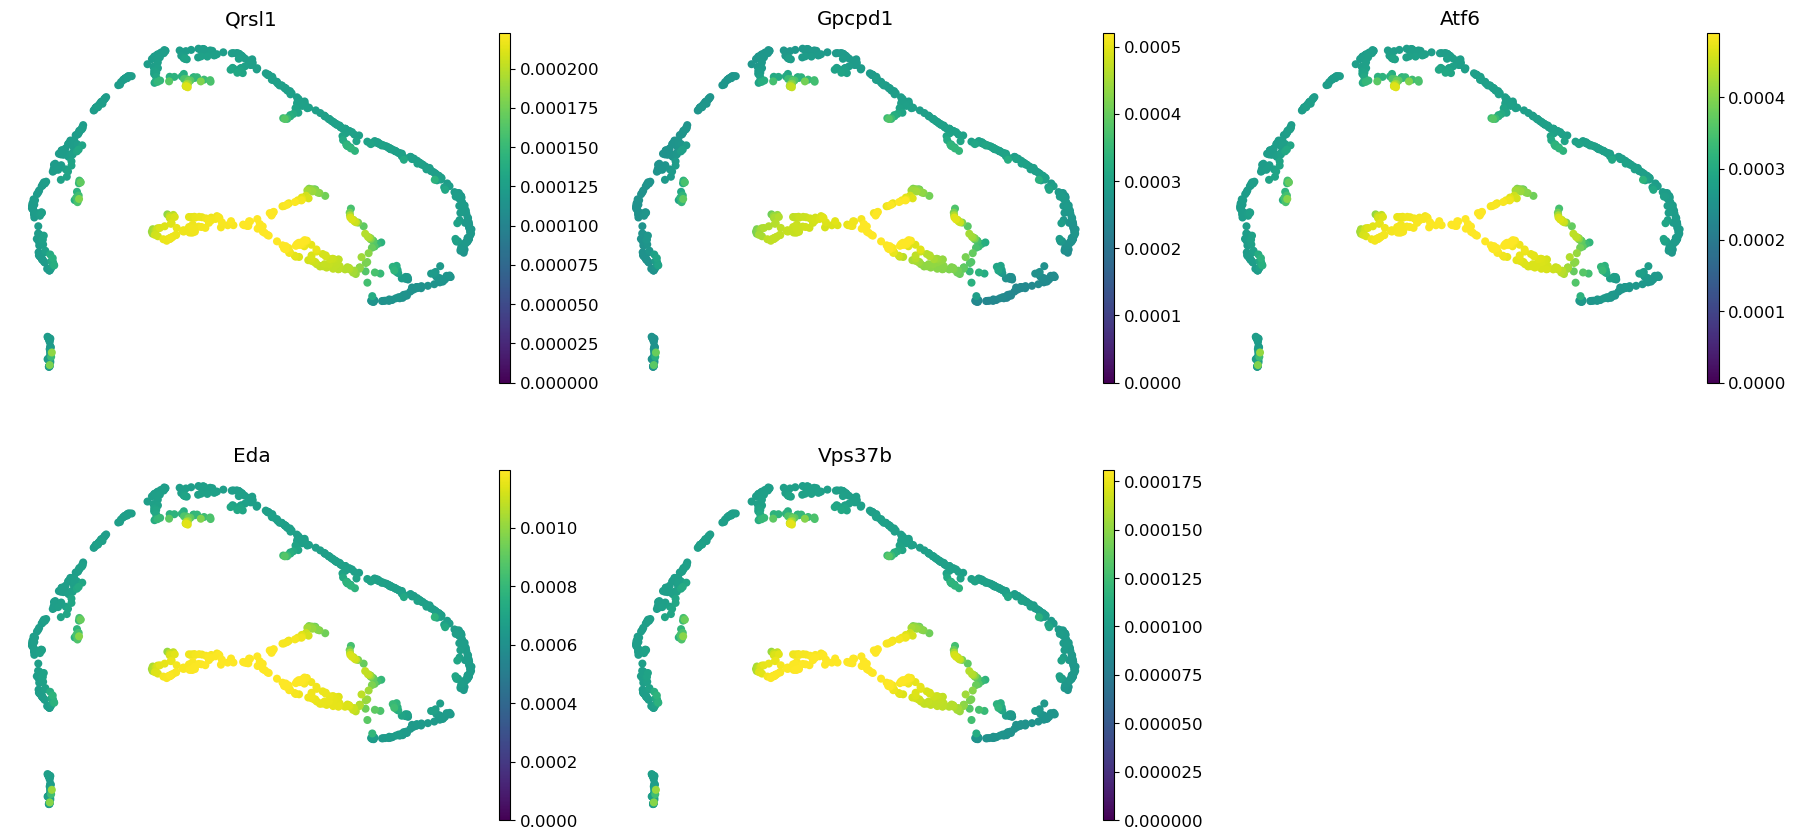

In [30]:
sc.pl.umap(rna_adata, color = litemodel.genes, frameon=False, color_map='viridis',
          layer='LITE_prediction', ncols=3, vmin = 0, vmax = 'p97')

**Gene Expression:**

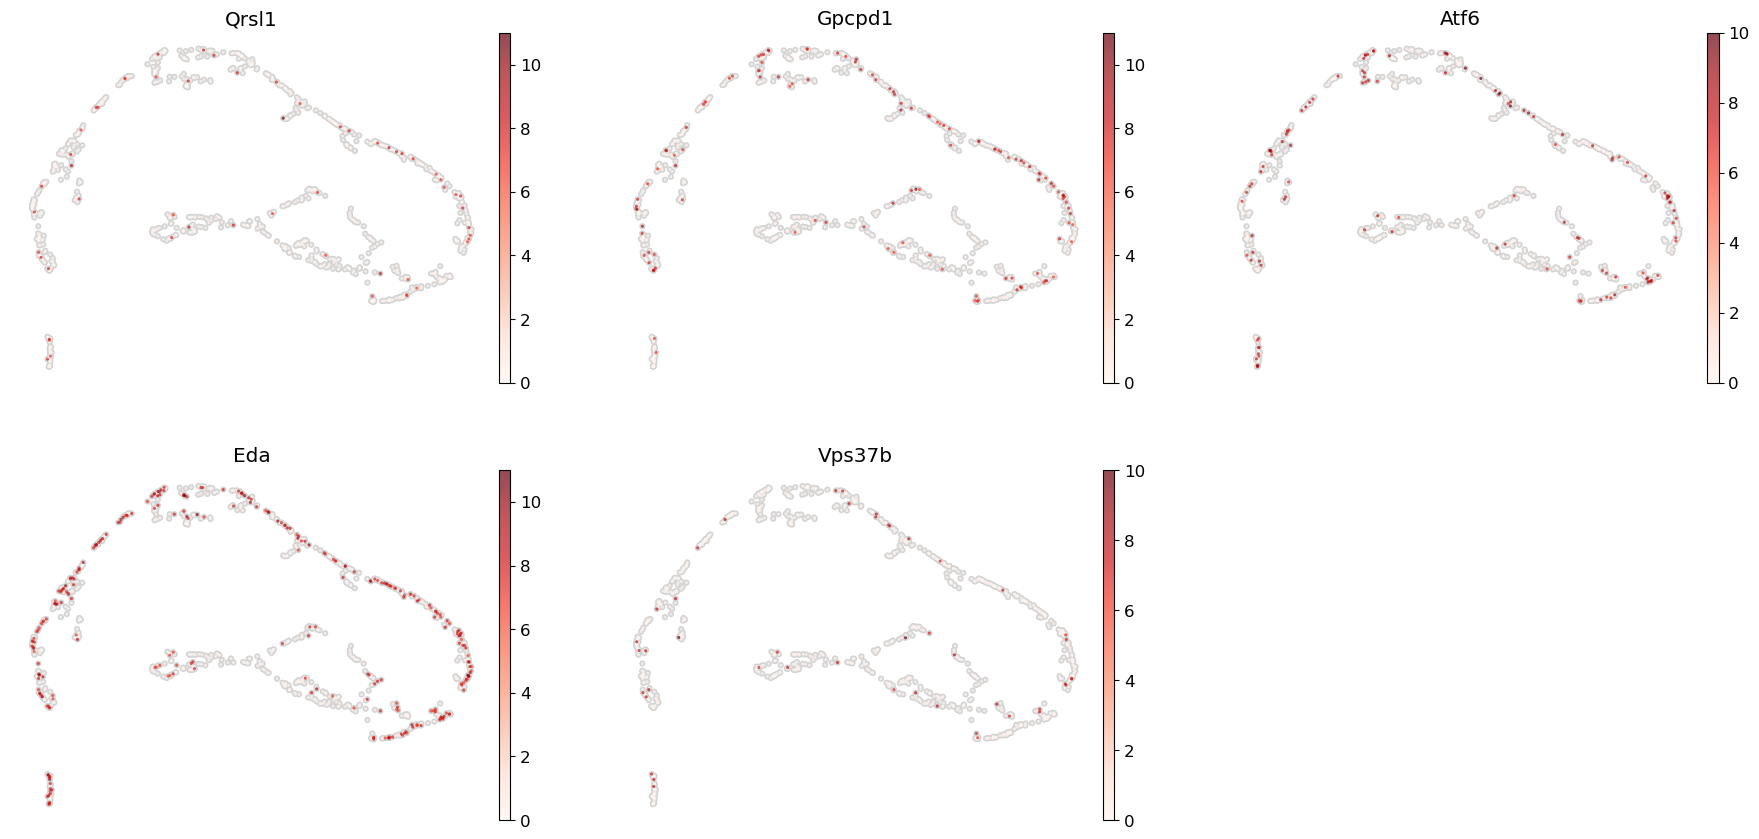

In [31]:
sc.pl.umap(rna_adata, color = litemodel.genes, **mira.pref.raw_umap(ncols=3, size = 20))

## Gene-TF targeting

### With probabilistic in-silico deletion (pISD)

RP models define a local chromatin neighborhood where changes in accessibility appear to influence gene expression. One may assume that transcription factor binding in many cis-regulatory elements within this neighborhood suggests the transcription factor regulates the gene of interest. MIRA can query for these types of interactions at a systems level, finding potential regulatory associations across many gene-TF pairs.

The algorithm for calculating these associations is called probabilistic *in-silico* deletion (pISD), and it measures the ability of the RP model to predict expression of a gene before and after the regulatory elements predicted to bind a certain transcription factor are masked. In this way, pISD simulates a “computational knock out” of that factor.

To compute association scores using each RP model against motif-based binding site predictions of all available transcription factors, use `litemodel.probabilistic_isd`:


In [75]:
litemodel.probabilistic_isd(**rp_args, n_workers = 12)

Predicting TF influence:   0%|          | 0/2674 [00:00<?, ?it/s]

INFO:mira.adata_interface.rp_model:Appending to expression adata:
INFO:mira.adata_interface.rp_model:Added key to varm: 'motifs-prob_deletion')
INFO:mira.adata_interface.rp_model:Added key to layers: motifs-informative_samples
INFO:mira.adata_interface.rp_model:Added key to uns: motifs


This test defines a matrix of association scores between gene-TF pairs. We can access this matrix directly with:

In [76]:
isd_matrix = mira.utils.fetch_ISD_matrix(rna_adata) # ISD results stored in RNA AnnData

isd_matrix # genes are rows, TFs are columns

,SOX5,ZIC3,JUN::JUNB,PAX9,FOXK2,ZBTB26,PAX6,HOXB2,E2F1,FOXN3,...,NFKB1,IRF3,NR2C1,IRF1,HOXB8,RFX7,RUNX2,POU3F3,RORB,HES1
Xkr4,0.000000,2.842171e-14,0.000000,0.0,0.000000,0.000000,0.660187,0.000000e+00,0.000000,0.0,...,0.000000,0.660187,2.842171e-14,0.000000e+00,0.000000,6.601865e-01,0.660187,0.000000e+00,0.0,2.842171e-14
Mrpl15,0.000000,-7.681371e-03,0.000000,0.0,0.000000,-0.007681,0.000000,-7.681371e-03,-0.007681,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,-0.007681,0.000000e+00,0.000000,0.000000e+00,0.0,-1.421380e-02
Vcpip1,0.000000,4.788859e-04,0.000000,0.0,0.000000,-0.032908,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,-0.032908,4.788859e-04,-3.290848e-02,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,2.401528e-04
Cops5,-0.000477,1.012237e-03,0.000000,0.0,-0.000477,0.001012,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,-0.000052,0.000000e+00,3.467233e-03,0.000000,0.000000e+00,-0.000477,-4.767811e-04,0.0,0.000000e+00
Slco5a1,0.000000,-1.307573e-03,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,...,-0.001308,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-0.009828,0.000000e+00,0.0,-1.307573e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vegfd,0.000000,-1.121899e-03,0.000000,0.0,0.000000,0.000000,-0.001122,-6.874808e-04,0.000000,0.0,...,0.000000,0.000000,0.000000e+00,-6.874808e-04,0.000000,0.000000e+00,0.000000,-6.874808e-04,0.0,0.000000e+00
Piga,0.000000,2.572103e-03,0.000000,0.0,0.000000,0.000000,0.002572,-8.598136e-10,0.000000,0.0,...,0.000000,0.000000,0.000000e+00,-8.598136e-10,0.000000,0.000000e+00,0.000000,-8.598136e-10,0.0,0.000000e+00
Gpm6b,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000e+00,-1.668131e-03,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,-3.242715e-03
Ofd1,0.000000,1.637090e-11,0.000000,0.0,0.000000,0.000911,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,0.001039,9.107058e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00


Save the RNA AnnData object with the TF-TG scores along with the matrix of TF-TG scores

In [77]:
rna_adata.write_h5ad("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_rna_data_tf_tg_scores.h5ad")
isd_matrix.to_csv("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_mira_tf_tg.tsv", sep="\t", header=True, index=True)

Restarting from this point:

In [14]:
rna_adata = anndata.read_h5ad("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_rna_data_tf_tg_scores.h5ad")
atac_adata = anndata.read_h5ad("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_atac_data_tss_dist.h5ad")

ds011_atac_model = mira.topics.load_model("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_atac_model.pth")
ds011_rna_model = mira.topics.load_model("/gpfs/Home/esm5360/MIRA/mira-datasets/ds011_rna_model.pth")

litemodel = mira.rp.LITE_Model.load_dir(
    expr_model = ds011_rna_model,
    accessibility_model = ds011_atac_model,
    prefix='/gpfs/Home/esm5360/MIRA/data/ds011_rpmodels/'
)

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


### Querying with many genes
One key limitation of the pISD algorithm is that binding site predictions are noisy - whether based on ChIP samples or especially as defined by motifs. Additionally, proximal binding predictions do not gaurantee mechanistic regulation. As such, testing one gene or one TF at a time is inadvisable.

Querying for shared association with transcription factors across many co-regulated genes, however, produces results much more robust to the afforementioned sources of error. After computing association scores between many TFs and genes, TF regulators of different topics can be determined to find drivers of different cell states.

We can query with many genes at a time to find potential regulators using `driver_TF_test`. The following Uses a Wilcoxon test to compare TF-TG association scores to find driver TFs for cells in topic 0.

In [15]:
isd_results = mira.tl.driver_TF_test(rna_adata, geneset=ds011_rna_model.get_top_genes(0, 150))


INFO:mira.tools.tf_targeting:Testing with 146 query genes and 2528 background genes, against 381 factors


Testing factors:   0%|          | 0/381 [00:00<?, ?it/s]

In [17]:
topic_0_driver_tfs_df = pd.DataFrame(isd_results).sort_values('pval').head(15)
topic_0_driver_tfs_df

,id,name,parsed_name,pval,test_statistic
67,MA0017.2,NR2F1,NR2F1,0.006083,205569.0
247,MA0865.1,E2F8,E2F8,0.018916,201556.0
11,MA0402.1,SWI5,SWI5,0.025286,201805.5
317,MA0059.1,MAX::MYC,MAX,0.025804,199537.0
238,MA1615.1,PLAGL1,PLAGL1,0.026091,201926.0
373,MA1535.1,NR2C1,NR2C1,0.028477,200510.5
59,MA1116.1,RBPJ,RBPJ,0.051020,198977.5
66,MA0899.1,HOXA10,HOXA10,0.052801,196750.0
303,MA1284.1,TCP1,TCP1,0.054516,198366.0
245,MA0216.2,CAD,CAD,0.059200,196183.5


As with topic enrichment, it is often instructive to compare and contrast regulators acting on two sets of genes. The `mira.pl.compare_driver_TFs_plot` function takes two genesets and calculates TF enrichment against both. In this case, I compare regulators of the top 150 genes associated with cells in topic 0 and topic 7, respectively:

INFO:mira.tools.tf_targeting:Testing with 146 query genes and 2528 background genes, against 381 factors


Testing factors:   0%|          | 0/381 [00:00<?, ?it/s]

INFO:mira.tools.tf_targeting:Testing with 147 query genes and 2527 background genes, against 381 factors


Testing factors:   0%|          | 0/381 [00:00<?, ?it/s]

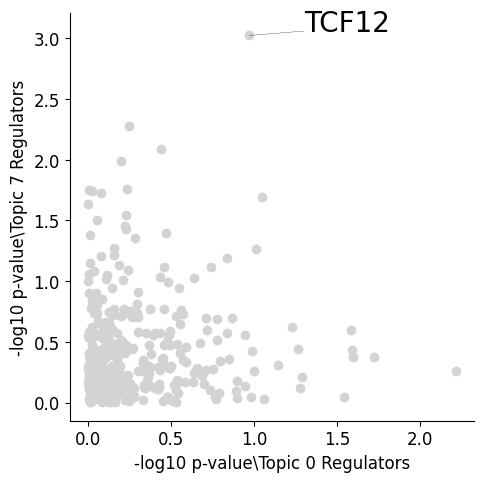

In [18]:
mira.pl.compare_driver_TFs_plot(rna_adata,
                                geneset1=ds011_rna_model.get_top_genes(0, 150),
                                geneset2=ds011_rna_model.get_top_genes(7, 150),
                                fontsize=20, figsize=(5,5), color='lightgrey',
                                axlabels= ('-log10 p-value\Topic 0 Regulators','-log10 p-value\Topic 7 Regulators'))
plt.show()

### Visualizing RP models

After identifying TF regulators of a gene-of-interest, you may want to visualize that gene’s cis-regulatory neighborhood and assess binding sites. More comprehensive epigenetic visualization is coming in future updates of MIRA, but for now, we recommend using pygenometracks. Install pygenometracks using:

You can use the RP model’s write_bedgraph method to write the RP model profile to a bedgraph file, which can be plotted by pygenometracks.

In [16]:
import pygenometracks

In [ ]:
!mkdir -p /gpfs/Home/esm5360/MIRA/data/

In [ ]:
litemodel['Atf6'].write_bedgraph(atac_adata,
                                 save_name = '/gpfs/Home/esm5360/MIRA/data/trackdata/WNT3_rpmodel.bedgraph')